In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
%matplotlib inline
import quantecon as qe
import scipy.optimize as optimize
import scipy.sparse as sparse
from quantecon import compute_fixed_point
from quantecon.markov import DiscreteDP
import copy
import csv
from Leapfrogging import leapfrogging
lf = leapfrogging()
from RLS import rls_class
import torch
rls = rls_class()

In [2]:
ss1 = lf.cSS(lf.nC)
ESS1 = lf.cESS(lf.nC)
Gtau= lambda ss, ESS, tau: lf.state_recursion(ss,ESS, tau)  
ESS, TAU, out=rls.solve(Gtau,ss1.copy(),ESS1.copy(),lf.stage_index)


ESR[0]['esr']  :
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
ESR[0]['bases']:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
ESR[1000]['esr']  :
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  1 -1  1  1 -1 -1 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1 -1]
ESR[1000]['bases']:
[0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
ESR[2000]['esr']  :
[-1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  1  0  0 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1]
ESR[2000]['bases']:
[0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
ESR[3000]['esr']  :
[-1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  0 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1]
ESR[3000]['bases']:
[0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0]
ESR[4000]['esr']  :
[-1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  0  1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1  1 -1]
ESR[4000]['bases']:
[0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0]
ESR[5000]['esr']  :
[-1 -1 -1 -

In [11]:
# save results to csv

to_csv = out

keys = to_csv[0].keys()

with open('output.csv', 'w', newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(to_csv)

In [12]:
# open the results
output2 = []
with open('output.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        output2.append(row)

In [13]:
number_of_equilibria=np.size(out)
T=torch.numel(torch.tensor(lf.stage_index))

y = np.zeros(T)
for i in range(T):
    y[i] = sum(TAU==i)
V = np.zeros((number_of_equilibria,2))
MPEesr = np.empty(number_of_equilibria,dtype='object')
for iEQ in range(number_of_equilibria):
    V[iEQ,0]=out[iEQ]['V1']
    V[iEQ,1]=out[iEQ]['V2']
    MPEesr[iEQ]=out[iEQ]['MPEesr']

In [14]:
number_of_equilibria

46707

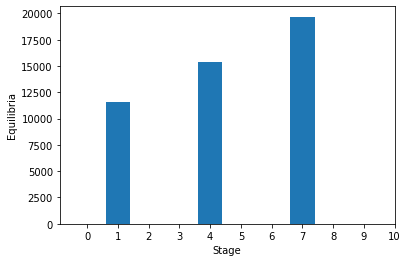

In [82]:
plt.bar(range(T),y)
fig1 = plt.gca()
fig1.set_ylabel('Equilibria')
fig1.set_xlabel('Stage')
fig1.set_xticks(np.arange(0, 11, 1))
plt.show()

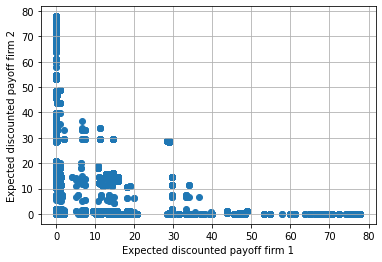

In [63]:
plt.scatter(V[:,0],V[:,1])
fig2 = plt.gca()
fig2.set_ylabel('Expected discounted payoff firm 2')
fig2.set_xlabel('Expected discounted payoff firm 1')
fig2.grid(True)
plt.show()